In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import pandas as pd




In [2]:
# Load and preprocess your data
data = pd.read_csv('../Curated_data/cluster_0_data.csv', low_memory=False)

(7508646.604, 7514935.876)

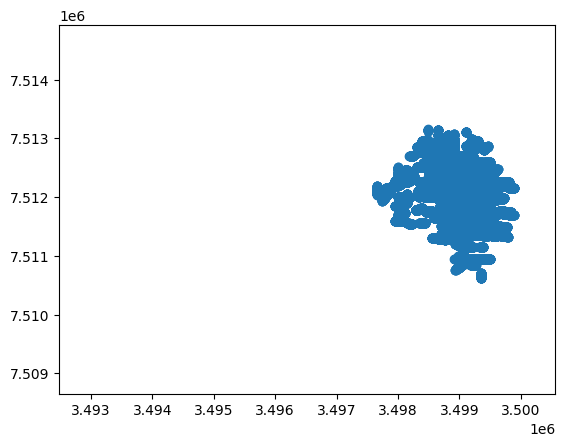

In [21]:
x = data['X']
y = data['Y']
plt.scatter(x,y)
plt.xlim((3492482.671, 3500563.909))
plt.ylim((7508646.604, 7514935.876))

# 1. Column filtering

In [3]:
for col in data:
    print(col)

Sample Number
Name
Depth From
Depth To
X
Y
Z
Length
Alt1_Code
Alt1_Int
Alt1_Style
Alt2_Code
Alt2_Int
Alt2_Style
Au_ppb
Comments
Core_Angle
Core_Diameter
CoreLoss_m
Cumulate
DataSet
Date_Logged
Density
Density_gcm3
Density_kgm3
Dest
Gamma_uRh
Gangue_Min
Interval_Length
Ir_ppb
Ja
Jn
Jr
Lith1_Code
Logged_By
Min1_Code
Min1_Pct
Min1_Style
Min2_Code
Min2_Pct
Min2_Style
Min3_Code
Min3_Pct
Min3_Style
Ore_Type
Ori_Confidence
Orig_Lith
Os_ppb
Pd_ppb
Proportion (Alt1_Code)
Proportion (Alt1_Int)
Proportion (Alt1_Style)
Proportion (Alt2_Code)
Proportion (Alt2_Int)
Proportion (Alt2_Style)
Proportion (Comments)
Proportion (DataSet)
Proportion (Date_Logged)
Proportion (Gangue_Min)
Proportion (Lith1_Code)
Proportion (Logged_By)
Proportion (Min1_Code)
Proportion (Min1_Style)
Proportion (Min2_Code)
Proportion (Min2_Style)
Proportion (Min3_Code)
Proportion (Min3_Style)
Proportion (Ore_Type)
Proportion (Ori_Confidence)
Proportion (Orig_Lith)
Proportion (samp_id)
Proportion (SampleID)
Proportion (Sulph1_Cod

## 1.1 Filter useless columns

First, filter for the columns that have severe problems, like too many NA's, or all same values.

Core Diameter: all NaNs <br>
Cumulate: all NaNs <br>
Dataset: all 0s  <br>
Recovery_m: all Nans <br>
Recovery_Pct: all Nans <br>
Re_ppm: all Nans <br>

Col numbers: 17, 19, 20, 86, 87, 143
Core Diameter, Cumulate, Dataset, Recovery_m, Recovery_pct, Re_ppm

In [4]:
# List of columns to exclude
columns_to_exclude = ["Core_Diameter", "Cumulate", "DataSet", "Recovery_m", "Recovery_Pct", "Re_ppm"]

# Drop the specified columns from the dataset
data = data.drop(columns=columns_to_exclude)

# Now, filtered_data contains all columns except the ones you wanted to exclude



# 1.2 Filter uninteresting variables 
Second, get rid of the columns that are not physical variables of interest

Sample Number <br>
Length <br>
CoreLoss_m <br>
Date_Logged <br>
Density <br>
Density_kgm3 <br>
Interval_Length <br>
Logged_By <br>
Ori_Confidence <br> 
samp_id <br>
SampleID <br>

Col numbers: 0, 7, 15, 16, 17, 19, 22, 27, 31, 65, 66  <br>
Sample_Number, Length, Core_Loss_m, Date_Logged, Density, Density_kgm3, Interval_Length, Logged_by, Ori_Confidence, samp_id, SampleID


In [5]:
# List of additional columns to exclude
additional_columns_to_exclude = ["Sample Number", "Length", "CoreLoss_m", "Date_Logged", "Density", "Density_kgm3", "Interval_Length", "Logged_By", "Ori_Confidence", "samp_id", "SampleID"]

# Drop the specified columns from the dataset
data = data.drop(columns=additional_columns_to_exclude)

# Now, filtered_data contains all columns except the ones you wanted to exclude


Filter all the ones with the word "Proportion", as they are also useless

In [6]:
data = data.filter(regex='^(?!.*Proportion).*$')


In [7]:
data

,Name,Depth From,Depth To,X,Y,Z,Alt1_Code,Alt1_Int,Alt1_Style,Alt2_Code,...,Te_ppm,Th_ppm,Ti_pct,Tl_ppm,U_ppm,V_ppm,W_ppm,Y_ppm,Zn_ppm,Zr_ppm
0,KEV_1,0.0,2.0,3498947.63,7511204.97,236.38,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KEV_1,2.0,4.0,3498948.84,7511204.92,234.79,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KEV_1,4.0,6.0,3498950.05,7511204.87,233.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KEV_1,6.0,8.0,3498951.26,7511204.82,231.61,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KEV_1,8.0,10.0,3498952.47,7511204.77,230.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81197,R319,242.0,244.0,3499086.36,7510950.00,89.91,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81198,R319,244.0,246.0,3499087.71,7510950.00,88.44,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81199,R319,246.0,248.0,3499089.07,7510950.00,86.97,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81200,R319,248.0,250.0,3499090.42,7510950.00,85.50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  1.3 Filter big proportion of missing values

The following code deletes columns that have over 95% missing values

In [8]:
# Calculate the percentage of NaN values in each column
nan_percentage = (data.isna().sum() / len(data)) * 100

# Define a threshold (99% in this case)
threshold = 90

# Get the column indices that have less than the threshold percentage of NaN values
columns_to_keep = nan_percentage[nan_percentage <= threshold].index

# Create a new DataFrame with only the selected columns
data = data[columns_to_keep]

# Now, filtered_data contains only columns with less than 99% NaN values


In [9]:
len(data.columns)

70

In [10]:

# Assuming 'data' is your DataFrame
# Create a copy of the original DataFrame to store the encoded data
encoded_data = data.copy()

# Define the threshold for one-hot encoding (e.g., 10 unique values)
threshold = 10

# Iterate through each column
for column in data.columns:
    # Check if the column is of object data type (categorical)
    if data[column].dtype == 'object':
        unique_values = data[column].nunique()
        
        # Check if the number of unique values is within the threshold
        if unique_values <= threshold:
            # Perform one-hot encoding for columns with unique values within the threshold
            encoded_columns = pd.get_dummies(encoded_data[column], prefix=column)
            encoded_columns = encoded_columns.astype(int)  # Convert to integers (0 or 1)
            encoded_data = pd.concat([encoded_data, encoded_columns], axis=1)
            encoded_data = encoded_data.drop(columns=[column])

# Now, 'encoded_data' contains the one-hot encoded columns within the specified threshold, with 0s and 1s.


In [11]:
data = encoded_data

## 1.3 Filter for correlation

In [12]:

def filter_numeric_columns(data):
    # Select only columns with numeric data types (int or float)
    numeric_columns = data.select_dtypes(include=['number'])
    
    return numeric_columns



# Filter non-numeric columns
filtered_data = filter_numeric_columns(data)




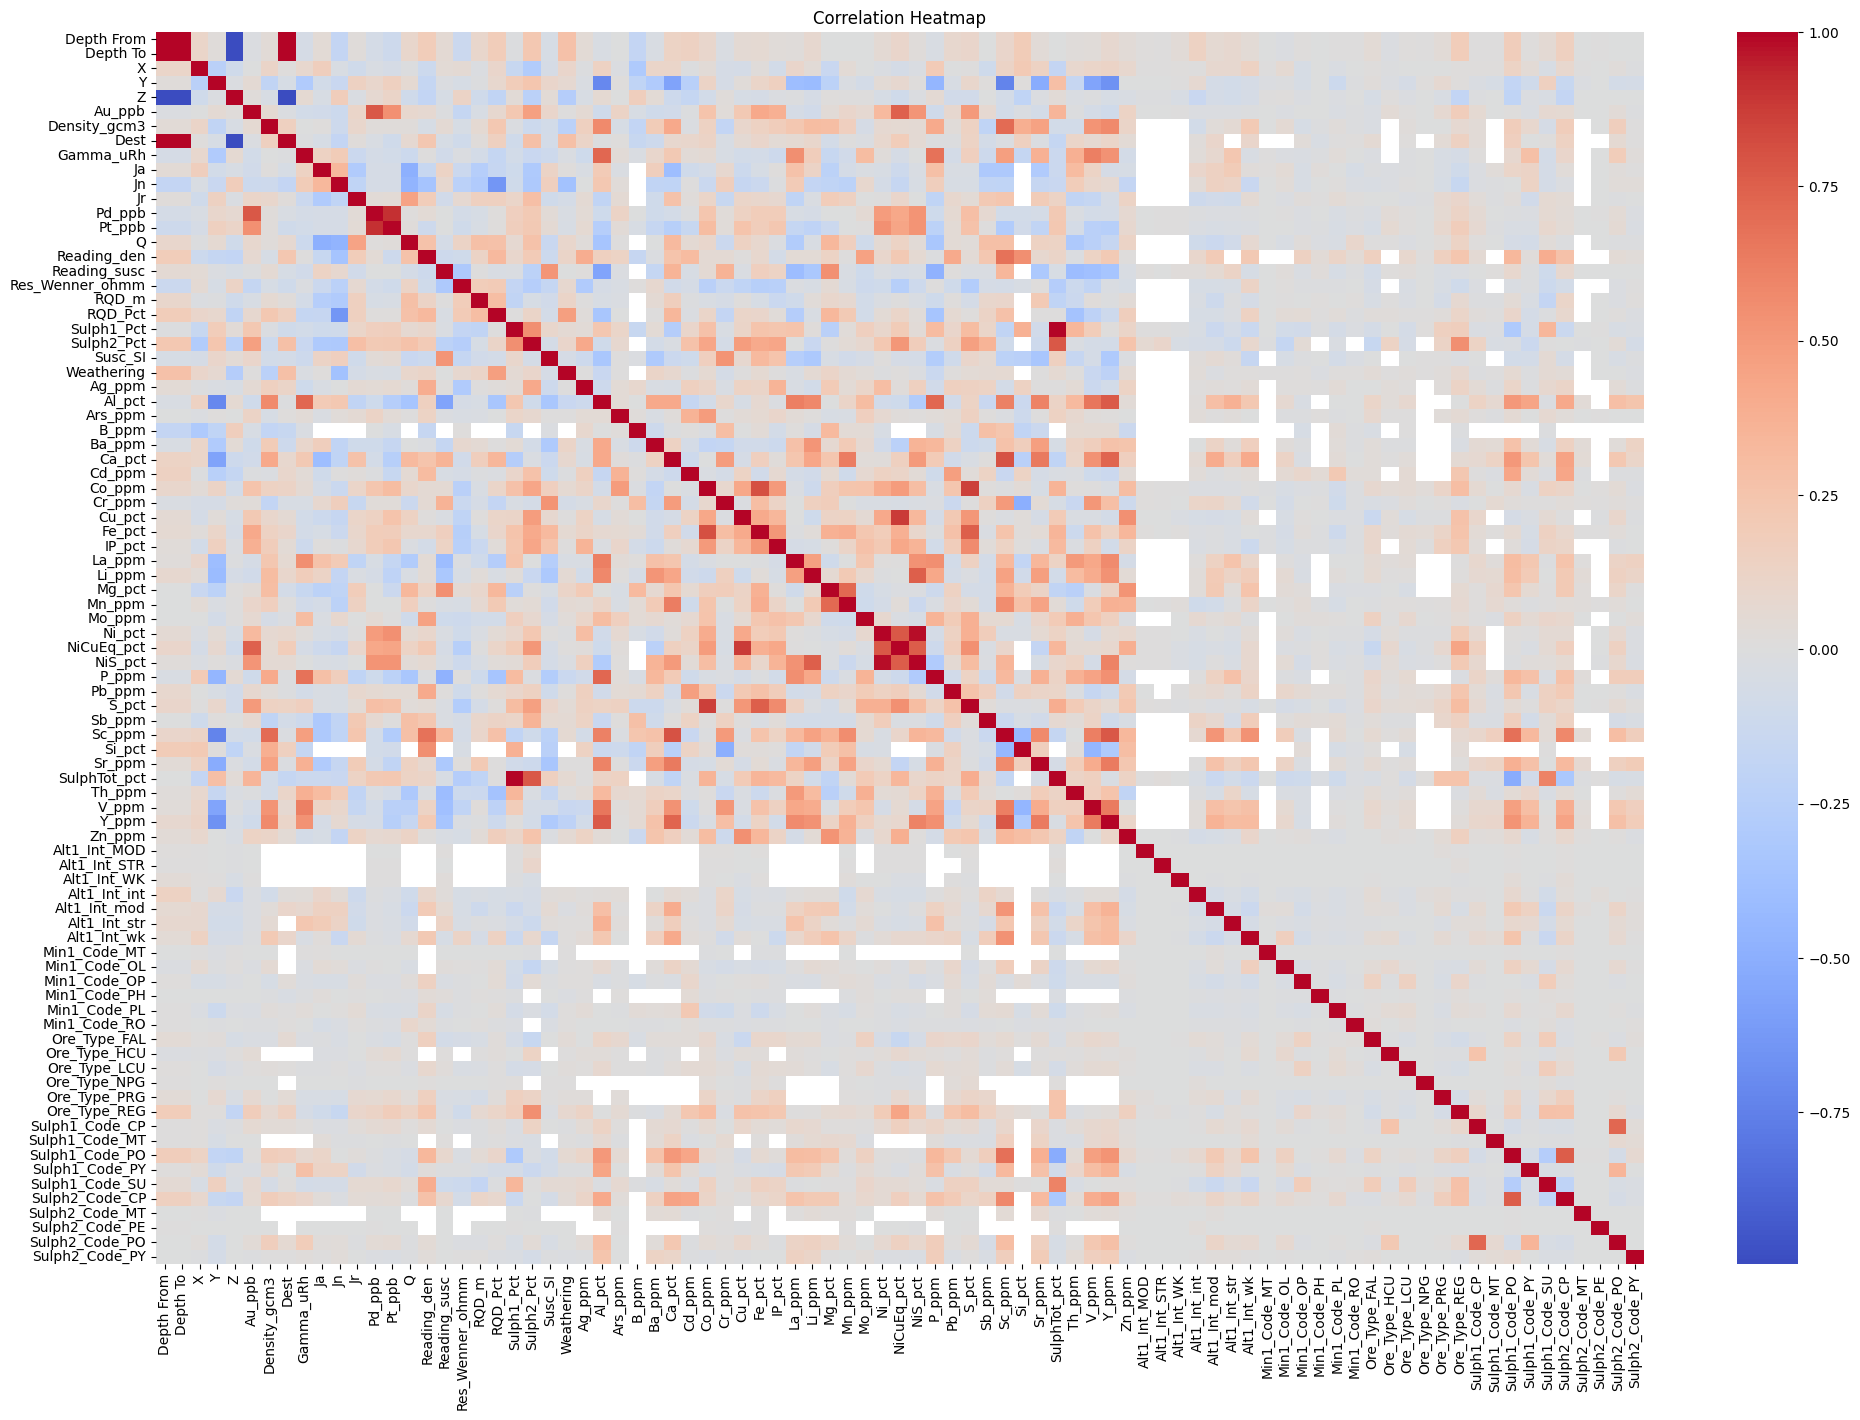

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Create a heatmap without displaying numeric values inside the cells
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


## 1.4 Filtering variables with small correlation to variables of interest

Our variables of interest are the elements + density (so no physical variables such as mag susc, etc) that have less than 80% missing values 

In [14]:
import re

# Create a regex pattern to match variable names with "pct," "ppm," or "ppb"
pattern = re.compile(r'.*(pct|ppm|ppb).*')

# Create a list of variables that match the pattern
variables_matching_pattern = [column for column in filtered_data.columns if pattern.search(column)]

# Filter the data for the variables matching the pattern
variables_of_interest = filtered_data[variables_matching_pattern]

# Now, filtered_data contains only the variables that match the specified pattern


In [15]:
# Define the threshold for missing values (80% in this case)
threshold = 80

# Calculate the percentage of missing values in each column
missing_percentage = (variables_of_interest.isnull().sum() / len(variables_of_interest)) * 100

# Get the column indices that have less than or equal to the threshold percentage of missing values
columns_to_keep = missing_percentage[missing_percentage <= threshold].index

# Create a new DataFrame with only the selected columns
variables_of_interest = variables_of_interest[columns_to_keep]

# Now, filtered_data contains only the variables with less than or equal to 80% missing values


In [16]:
variables_of_interest.columns

Index(['Au_ppb', 'Pd_ppb', 'Pt_ppb', 'Co_ppm', 'Cr_ppm', 'Cu_pct', 'Fe_pct',
       'Mn_ppm', 'Ni_pct', 'Pb_ppm', 'S_pct', 'SulphTot_pct', 'Zn_ppm'],
      dtype='object')

In [ ]:
# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Define the threshold correlation value (absolute value)
threshold = 0.2

# Initialize the list of variables of interest with "Density_gcm3"
variables_of_interest = ['Au_ppb', 'Pd_ppb', 'Pt_ppb', 'Co_ppm', 'Cr_ppm', 'Cu_pct', 'Fe_pct',
       'Mn_ppm', 'Ni_pct', 'Pb_ppm', 'S_pct', 'SulphTot_pct', 'Zn_ppm', 'Density_gcm3']

# Create a list to store the variables that should be kept
variables_to_keep = ["X", "Y", "Z", 'Density_gcm3']

# Create a list to store the variables to remove
variables_to_remove = []

# Iterate through the columns and check the correlation with variables of interest
for column in corr_matrix.columns:
    if column in variables_of_interest:
        other_variables = [var for var in variables_of_interest if var != column]
        # Check if the minimum absolute correlation with the other variables of interest is smaller than the threshold
        if abs(corr_matrix[column][other_variables]).max() < threshold:
            variables_to_remove.append(column)
    else:
        # Check if the minimum absolute correlation with the variables of interest is smaller than the threshold
        if abs(corr_matrix[column][variables_of_interest]).max() < threshold:
            variables_to_remove.append(column)


#variables_to_remove.append("Alt1_Int_tr")

# Drop the variables with correlation (absolute value) smaller than the threshold
remaining_data = filtered_data.drop(columns=variables_to_remove)

# Add the variables to keep back to the remaining_data
remaining_data[variables_to_keep] = filtered_data[variables_to_keep]


: 

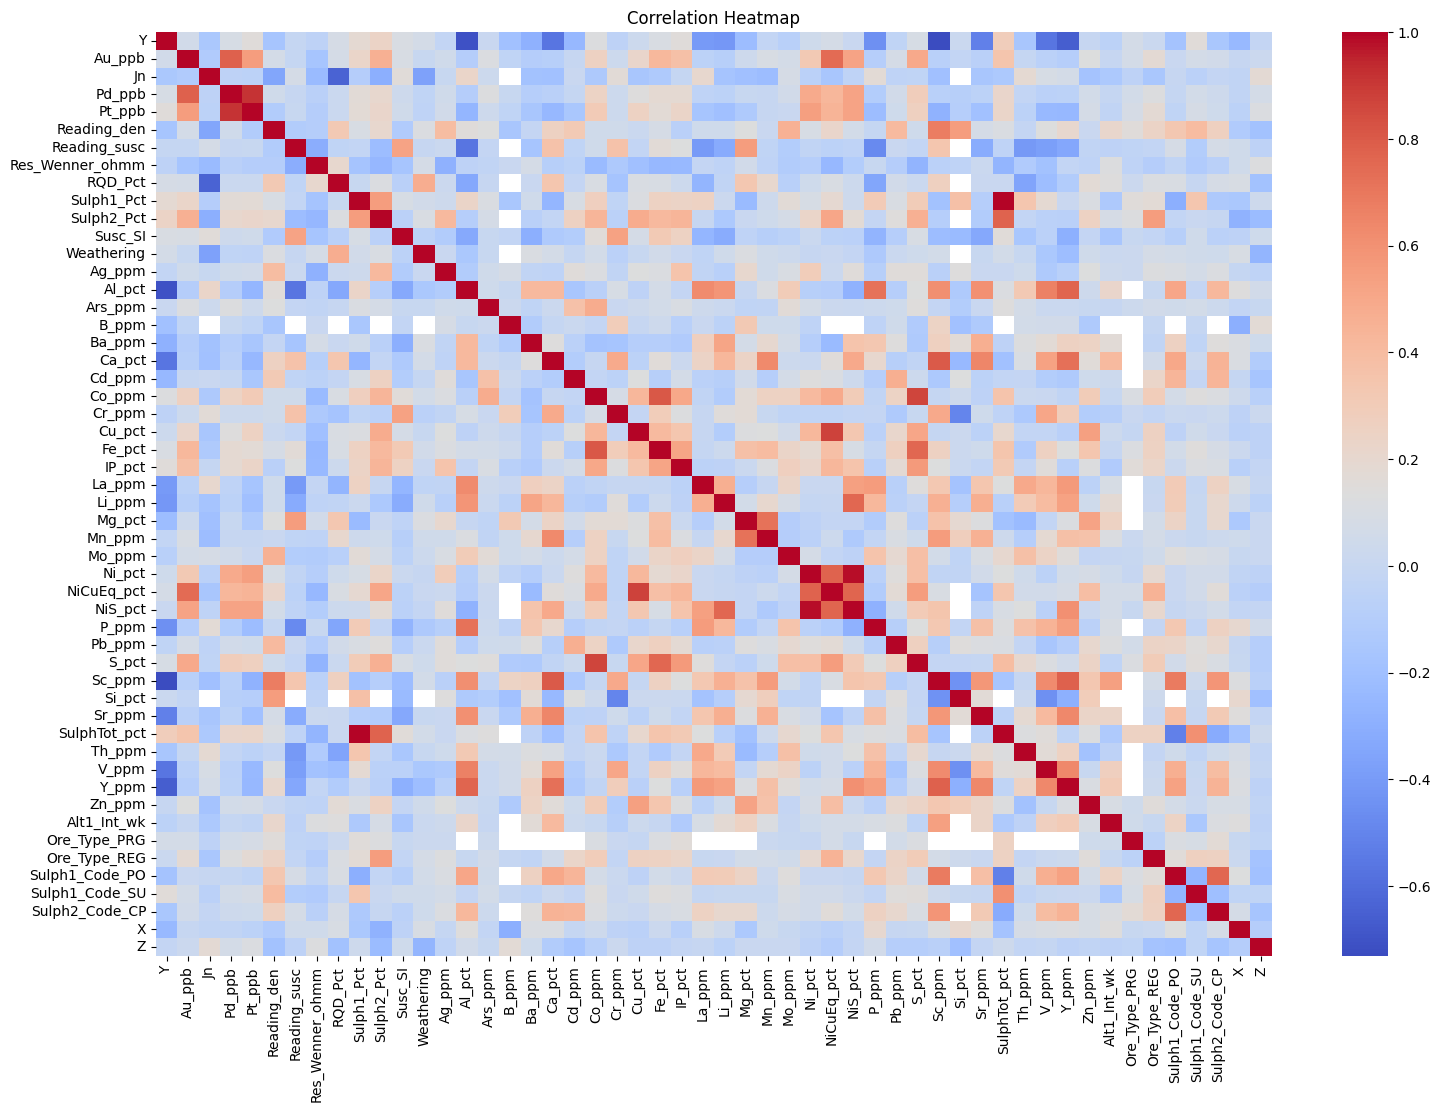

In [19]:
# Calculate the correlation matrix
corr_matrix = remaining_data.corr()

# Create a heatmap without displaying numeric values inside the cells
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = remaining_data.drop(columns=['Density_gcm3'])
y = data['Density_gcm3']

In [ ]:
# Replace missing values in X with zeros
X_filled = X.fillna(0)

# Now X_filled contains missing values replaced with 0s
X_filled

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()

# Normalize the data in X_filled
X_normalized = scaler.fit_transform(X_filled)

# Now X_normalized contains the normalized data


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Preprocess your data, including handling missing values and normalization

# Define the architecture of the autoencoder
input_dim = X_normalized.shape[1]  # Number of input features
encoding_dim = 10  # You can adjust this for dimensionality reduction

autoencoder = keras.models.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(encoding_dim, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(input_dim)
])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=32, validation_split=0.2)

# Extract feature importance from the bottleneck layer
encoder_layer = autoencoder.layers[3]  # Choose the bottleneck layer
encoded_X = encoder_layer.predict(X)

# You can analyze the encoded_X to identify important features
